<h1>Import</h1>

In [1]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from static_data import HAIRCUTS

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from datetime import datetime

from model.config import Config

from analysis_tools.compute_data import compute_collateral_value, compute_funding_dataframe
from analysis_tools.loading_data import loading_data
from static_data import START_TIME, END_TIME
from strategy.max_function_rate_sec import MaxFundingRateSec
from strategy.best_gain import BestGain


<h1>Process data</h1>

In [3]:
dataset = loading_data()

collateral_value = compute_collateral_value()

config = Config(
    dataset=dataset, 
    tokens=list(collateral_value.keys()),
    start_date=datetime.strptime(START_TIME, "%d-%m-%Y"),
    end_date=datetime.strptime(END_TIME, "%d-%m-%Y"),
)

funding_df = compute_funding_dataframe(dataset)

<h1>Run Strategy</h1>

In [4]:
strat = BestGain(funding_df, config)

In [5]:
strat.apply()

<h1>Visualisation of the result</h1>

In [7]:
strat.apply_stats()

PnL (with fee) 132705.19
           Fee 53818.93
           APY 5.31

************************* RECAP ****************************
      token potential_gain_usd  amount_invested APY_BY_TOKEN
0  AAVEUSDT        6333.974396           250000     0.025336
1   BNBUSDT       10643.662916           250000     0.042575
2   BTCUSDT       15690.205124           250000     0.062761
3  DOGEUSDT        34331.62055           250000     0.137326
4   ETHUSDT       17101.225751           250000     0.068405
5  MASKUSDT       22787.631071           250000     0.091151
6   SOLUSDT       27753.009669           250000     0.111012
7      USDT       42501.746287           500000     0.085003
8   XRPUSDT        9381.045649           250000     0.037524


In [28]:
invested = strat.result.loc[(strat.result["ACTION"]=="INVESTED") & (strat.result["is_profitable"]==True)]

In [71]:
pnl_by_token = pd.pivot_table(data=invested, values='potential_gain_usd', index=["timestamp"], columns=["token"], aggfunc="sum", fill_value=0)
fee_by_token = pd.pivot_table(data=invested, values='fee_amount', index=["timestamp"], columns=["token"], aggfunc="sum", fill_value=0)

pnl_by_token.index = pd.to_datetime(pnl_by_token.index, format="%d-%m-%Y")

pnl_by_token

token,AAVEUSDT,BNBUSDT,BTCUSDT,DOGEUSDT,ETHUSDT,MASKUSDT,SOLUSDT,USDT,XRPUSDT
timestamp,,,,,,,,,
2024-01-01 08:00:00,0.000000,0.000000,124.956550,0.000000,79.917271,98.402128,97.588720,249.775,102.713933
2024-01-01 16:00:00,134.905264,0.000000,0.000000,106.177086,108.475759,134.080786,154.613626,297.445,0.000000
2024-01-02 00:00:00,207.371226,0.000000,171.302466,143.487283,0.000000,0.000000,166.336071,394.205,162.433094
2024-01-02 08:00:00,190.233045,0.000000,133.686884,184.025025,0.000000,0.000000,208.708789,371.900,148.533648
2024-01-02 16:00:00,184.714934,0.000000,176.132496,188.727127,0.000000,0.000000,260.216543,484.005,192.023834
...,...,...,...,...,...,...,...,...,...
2024-05-29 00:00:00,0.000000,47.988487,0.000000,50.203358,76.143443,0.000000,80.031170,96.755,0.000000
2024-05-29 08:00:00,0.000000,47.713429,42.740457,142.002652,0.000000,0.000000,70.834641,152.905,0.000000
2024-05-29 16:00:00,0.000000,47.495774,49.800188,86.510958,72.479235,0.000000,0.000000,94.915,45.228075


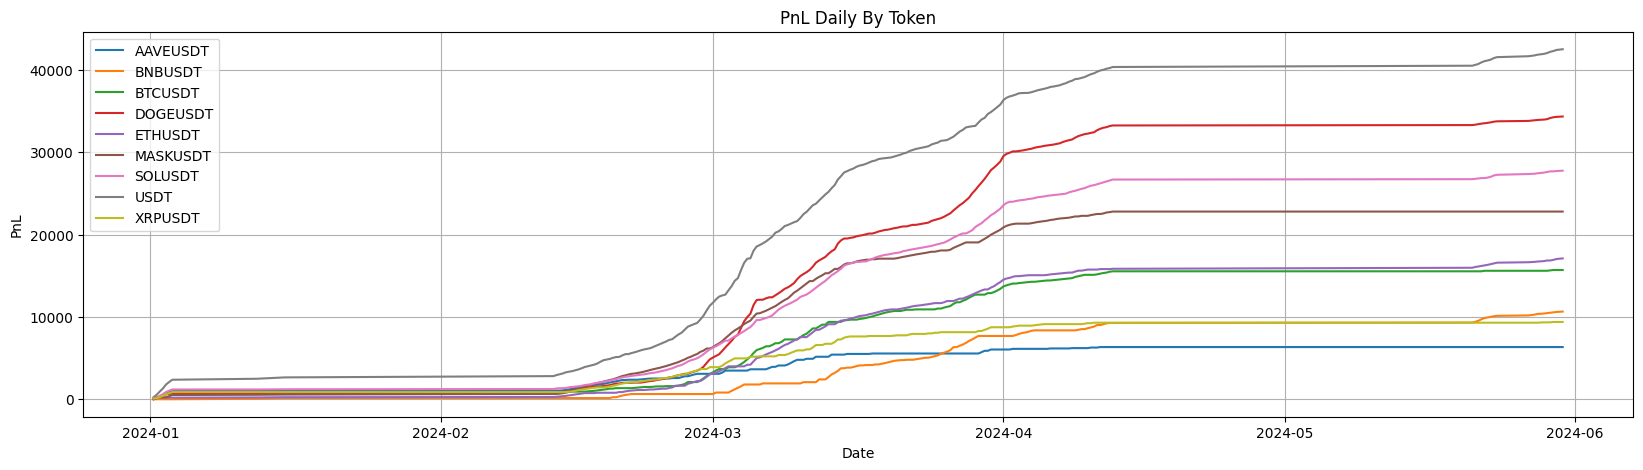

In [73]:
plt.figure(figsize=(20, 5))
for col in pnl_by_token.columns.tolist():
    plt.plot(pnl_by_token.index, pnl_by_token[col].cumsum(), label=col)
plt.title('PnL Daily By Token')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.legend()
plt.grid(True) 
plt.show()

In [74]:
pnl_by_token["TOTAL"] = pnl_by_token.apply(lambda x: sum(x), axis=1)

In [77]:
pnl_by_token

token,AAVEUSDT,BNBUSDT,BTCUSDT,DOGEUSDT,ETHUSDT,MASKUSDT,SOLUSDT,USDT,XRPUSDT,TOTAL
timestamp,,,,,,,,,,
2024-01-01 08:00:00,0.000000,0.000000,124.956550,0.000000,79.917271,98.402128,97.588720,249.775,102.713933,753.353603
2024-01-01 16:00:00,134.905264,0.000000,0.000000,106.177086,108.475759,134.080786,154.613626,297.445,0.000000,935.697521
2024-01-02 00:00:00,207.371226,0.000000,171.302466,143.487283,0.000000,0.000000,166.336071,394.205,162.433094,1245.135141
2024-01-02 08:00:00,190.233045,0.000000,133.686884,184.025025,0.000000,0.000000,208.708789,371.900,148.533648,1237.087390
2024-01-02 16:00:00,184.714934,0.000000,176.132496,188.727127,0.000000,0.000000,260.216543,484.005,192.023834,1485.819935
...,...,...,...,...,...,...,...,...,...,...
2024-05-29 00:00:00,0.000000,47.988487,0.000000,50.203358,76.143443,0.000000,80.031170,96.755,0.000000,351.121458
2024-05-29 08:00:00,0.000000,47.713429,42.740457,142.002652,0.000000,0.000000,70.834641,152.905,0.000000,456.196180
2024-05-29 16:00:00,0.000000,47.495774,49.800188,86.510958,72.479235,0.000000,0.000000,94.915,45.228075,396.429231


In [78]:
fee_by_token["TOTAL"] = fee_by_token.apply(lambda x: sum(x), axis=1)

In [79]:
fee_by_token

token,AAVEUSDT,BNBUSDT,BTCUSDT,DOGEUSDT,ETHUSDT,MASKUSDT,SOLUSDT,USDT,XRPUSDT,TOTAL
timestamp,,,,,,,,,,
2024-01-01 08:00:00,0.000000,0.000000,208.505048,0.000000,208.505048,208.505048,208.505048,208.505048,208.505048,2502.060578
2024-01-01 16:00:00,212.966597,0.000000,0.000000,212.966597,212.966597,212.966597,212.966597,212.966597,0.000000,2555.599158
2024-01-02 00:00:00,216.109361,0.000000,216.109361,216.109361,0.000000,0.000000,216.109361,216.109361,216.109361,2593.312334
2024-01-02 08:00:00,218.913424,0.000000,218.913424,218.913424,0.000000,0.000000,218.913424,218.913424,218.913424,2626.961091
2024-01-02 16:00:00,214.815690,0.000000,214.815690,214.815690,0.000000,0.000000,214.815690,214.815690,214.815690,2577.788274
...,...,...,...,...,...,...,...,...,...,...
2024-05-29 00:00:00,0.000000,291.739626,0.000000,291.739626,291.739626,0.000000,291.739626,291.739626,0.000000,2917.396261
2024-05-29 08:00:00,0.000000,293.098469,293.098469,293.098469,0.000000,0.000000,293.098469,293.098469,0.000000,2930.984690
2024-05-29 16:00:00,0.000000,264.691373,264.691373,264.691373,264.691373,0.000000,0.000000,264.691373,264.691373,3176.296476


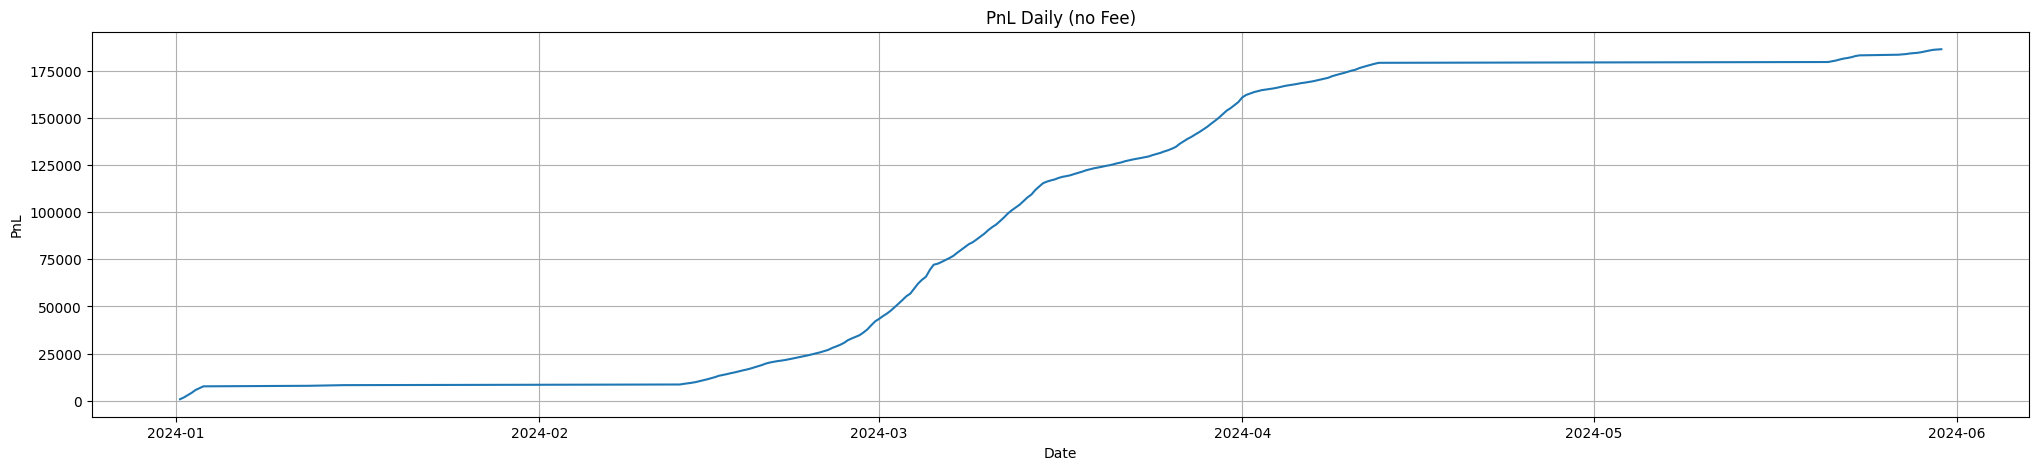

In [86]:
plt.figure(figsize=(25, 5))
plt.plot(pnl_by_token.index, pnl_by_token['TOTAL'].cumsum())
plt.title('PnL Daily (no Fee)')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.grid(True)
plt.show()

In [89]:
result = strat.result

In [90]:
invested = pd.pivot_table(data=result.loc[result["ACTION"]=="INVESTED"], values='collateral_needed_usd', index=["timestamp"], columns=["ACTION"], aggfunc="sum", fill_value=0)

In [91]:
posted = pd.pivot_table(data=result.loc[result["ACTION"]=="POSTED"], values='collateral_value_usd', index=["timestamp"], columns=["ACTION"], aggfunc="sum", fill_value=0)

In [92]:
collateral_management = pd.merge(invested.reset_index(), posted.reset_index(), on="timestamp", how="inner")

In [93]:
collateral_management["ratio collateralization (%)"] = collateral_management["INVESTED"] / collateral_management["POSTED"]

In [94]:
collateral_management

ACTION,timestamp,INVESTED,POSTED,ratio collateralization (%)
0,2024-01-01 08:00:00,1.755075e+06,2.194108e+06,0.799904
1,2024-01-01 16:00:00,1.773077e+06,2.258531e+06,0.785058
2,2024-01-02 00:00:00,1.804440e+06,2.286597e+06,0.789138
3,2024-01-02 08:00:00,1.826857e+06,2.317216e+06,0.788384
4,2024-01-02 16:00:00,1.798326e+06,2.268196e+06,0.792844
...,...,...,...,...
450,2024-05-30 08:00:00,2.219857e+06,3.167904e+06,0.700734
451,2024-05-30 16:00:00,2.256499e+06,3.220303e+06,0.700710
452,2024-05-31 00:00:00,2.229756e+06,3.209798e+06,0.694672
453,2024-05-31 08:00:00,2.224139e+06,3.135421e+06,0.709359


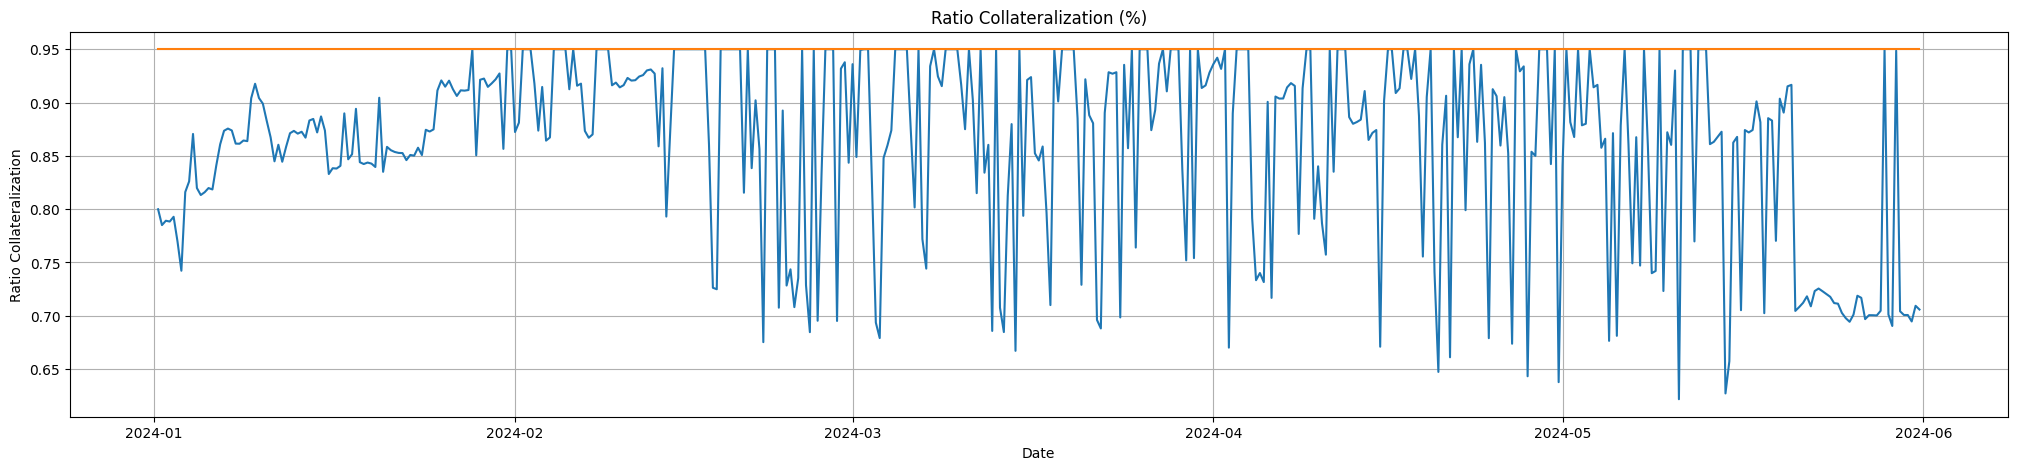

In [96]:
plt.figure(figsize=(25, 5))
plt.plot(collateral_management.timestamp, collateral_management['ratio collateralization (%)'], label="collateral used")
plt.plot(collateral_management.timestamp, [0.95 for _ in collateral_management.timestamp], label="buffer")
plt.title('Ratio Collateralization (%)')
plt.xlabel('Date')
plt.ylabel('Ratio Collateralization')
plt.grid(True)
plt.show()

In [100]:
recap = strat.recap

In [102]:
pnl = recap["pnl_by_token"]

In [130]:
pnl["gain_with_fee"] = (recap["pnl_with_fee"] / pnl["potential_gain_usd"].sum()) * (pnl["potential_gain_usd"])

In [132]:
pnl["apy_with_fee"] = pnl["gain_with_fee"] / pnl["amount_invested"]

In [133]:
pnl

,token,potential_gain_usd,amount_invested,APY_BY_TOKEN,percentage,gain_with_fee,apy_with_fee
0,AAVEUSDT,6333.974396,250000,0.025336,0.033958,4506.394619,0.018026
1,BNBUSDT,10643.662916,250000,0.042575,0.057063,7572.582756,0.03029
2,BTCUSDT,15690.205124,250000,0.062761,0.084119,11163.015749,0.044652
3,DOGEUSDT,34331.62055,250000,0.137326,0.184060,24425.711319,0.097703
4,ETHUSDT,17101.225751,250000,0.068405,0.091684,12166.906097,0.048668
5,MASKUSDT,22787.631071,250000,0.091151,0.122170,16212.578645,0.06485
6,SOLUSDT,27753.009669,250000,0.111012,0.148790,19745.266654,0.078981
7,USDT,42501.746287,500000,0.085003,0.227862,30238.461474,0.060477
8,XRPUSDT,9381.045649,250000,0.037524,0.050294,6674.276053,0.026697
